# ***Introduction:***

*Health insurance in India is a growing segment of India's economy. The Indian health system is one of the largest in the world, with the number of people it concerns: nearly 1.3 billion potential beneficiaries. The health industry in India has rapidly become one of the most important sectors in the country in terms of income and job creation. In 2018, one hundred million Indian households (500 million people) do not benefit from health coverage. In 2011, 3.9%[1] of India's gross domestic product was spent in the health sector*.

*According to the World Health Organization (WHO), this is among the lowest of the BRICS (Brazil, Russia, India, China, South Africa) economies. Policies are available that offer both individual and family cover. Out of this 3.9%, health insurance accounts for 5-10% of expenditure, employers account for around 9% while personal expenditure amounts to an astounding 82%.*

*In the year 2016, the NSSO released the report “Key Indicators of Social Consumption in India: Health” based on its 71st round of surveys. The survey carried out in the year 2014 found out that, more than 80% of Indians are not covered under any health insurance plan, and only 18% (government funded 12%) of the urban population and 14% (government funded 13%) of the rural population was covered under any form of health insurance.*

*India's public health expenditures are lower than those of other middle-income countries. In 2012, they accounted for 4% of GDP, which is half as much as in China with 5.1%. In terms of public health spending per capita, India ranks 184th out of 191 countries in 2012. Patients' remaining costs represent about 58% of the total.[4] The remaining costs borne by the patient represent an increasing share of the household budget, from 5% of this budget in 2000 to over 11% in 2004-2005.[5] On average, the remaining costs of poor households as a result of hospitalization accounted for 140% of their annual income in rural areas and 90% in urban areas.*

*This financial burden has been one of the main reasons for the introduction of health insurance covering the hospital costs of the poorest.*


# ***Data Description :***
*The data at hand contains medical costs of people characterized by certain attributes*.


# ***Domain:***
*Healthcare*


# ***Context:***
*Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.*

*Attribute Information:*

*	age : age of primary beneficiary
*	sex : insurance contractor gender, female, male
*	bmi : Body mass index, providing an understanding of body,
*	weights that are relatively high or low relative to height,
*	objective index of body weight (kg / m ^ 2) using the ratio of
*	height to weight, ideally 18.5 to 24.9
*	children : Number of children covered by health insurance /
*	Number of dependents
*	smoker : Smoking
*	region : the beneficiary's residential area in the US, northeast,southeast, southwest, northwest.
*	charges : Individual medical costs billed by health insurance.



In [ ]:
import pandas as pd
data = pd.read_csv('/content/insurance-1.csv')
data.head(62)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
57,18,male,31.680,2,yes,southeast,34303.16720
58,53,female,22.880,1,yes,southeast,23244.79020
59,34,female,37.335,2,no,northwest,5989.52365
60,43,male,27.360,3,no,northeast,8606.21740


# ***Basic EDA:***#

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<ipython-input-10-70bf70e9a810>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.color_palette("rocket_r", as_cmap=True)

    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'g')
    plt.title(f'{x.capitalize()} Density Distribution')

    plt.subplot(222)
    ax2 = sns.boxplot(x=data[x], palette = 'colorblind', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')

    plt.subplot(223)
    ax2 = sns.violinplot(x = data[x], palette = 'deep', split = True)
    plt.title(f'{x.capitalize()} Violinplot')

    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')

    plt.show()

In [ ]:
def box_plot(x = 'bmi'):
    def add_values(bp, ax):
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                (x_l, y),(x_r, _) = line.get_xydata()
                if not bp is(y):
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y
                    ax.text(x_line_center, y_line_center, '%.2f' % y, verticalalignment='center', fontsize=10, backgroundcolor="silver")

    fig, axes = plt.subplots(1, figsize=(4 , 7))
    blue_pent = dict(markerfacecolor='#728FCE', marker='p')
    bp_dict = data.boxplot(column = x,
                             grid=True,
                             figsize=(5 , 10),
                             ax=axes,
                             vert = True,
                             notch=False,
                             widths = 0.7,
                             showmeans = True,
                             whis = 1.5,
                             flierprops = blue_pent,
                             boxprops= dict(linewidth=2.0, color='skyblue'),
                             whiskerprops=dict(linewidth=2.0, color='skyblue'),
                             return_type = 'dict')

    add_values(bp_dict, axes)

    plt.title(f'{x.capitalize()} Boxplot', fontsize=15)
    plt.ylabel(f'{x.capitalize()}', fontsize=15)
    plt.show()

    skew = data[x].skew()
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {data[x].mean()}')
    print(f'Median {x.capitalize()} = {data[x].median()}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')

5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 27.0
Q2(Median)            : 39.0
Q3                    : 51.0
Age(max) : 64


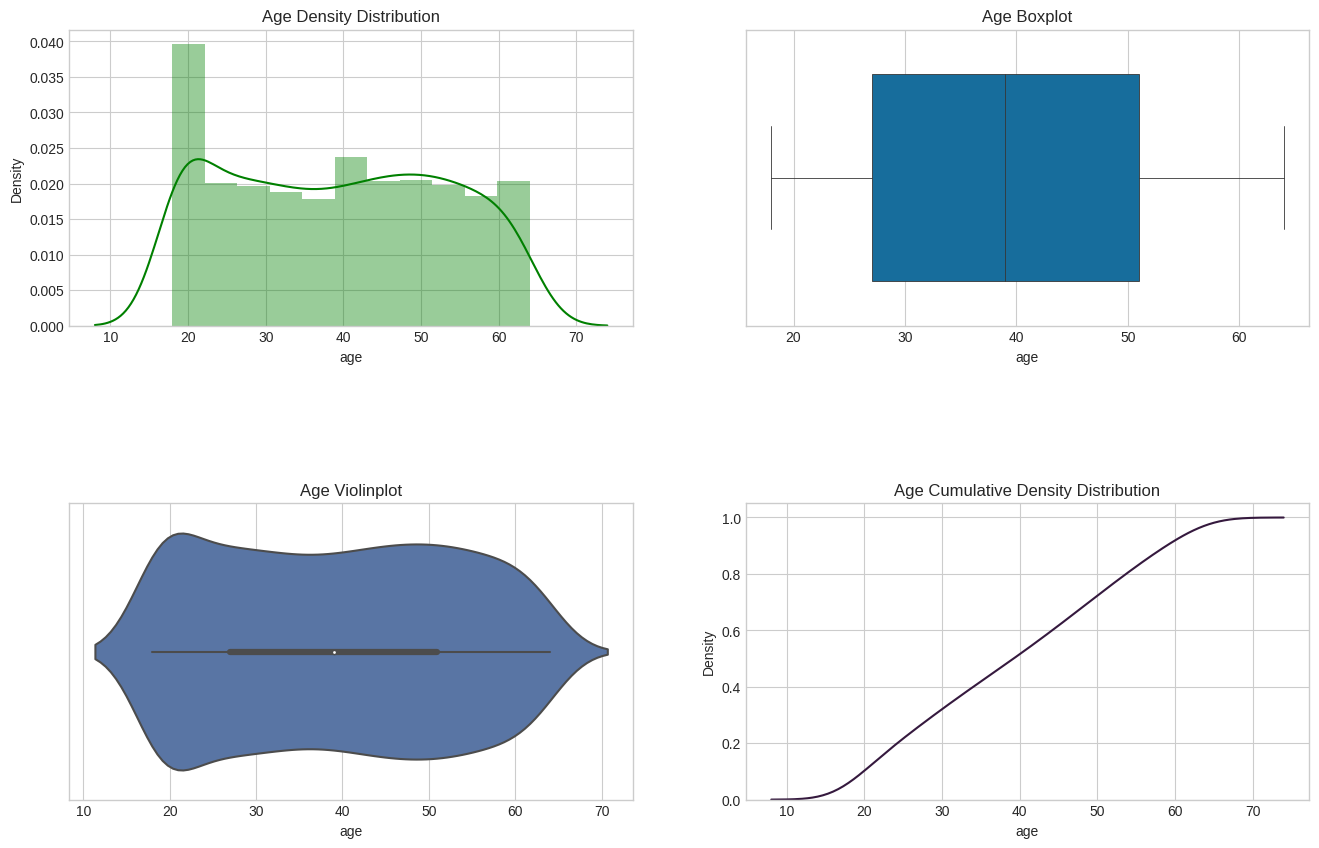

In [ ]:
summary('age')


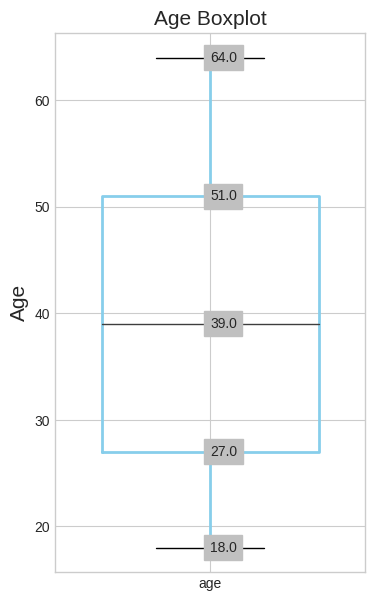

Mean Age = 39.20702541106129
Median Age = 39.0
Skewness of age: 0.05567251565299186.
Total number of outliers in age distribution: 0.


In [ ]:
box_plot('age')


5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1                    : 26.29625
Q2(Median)            : 30.4
Q3                    : 34.69375
Bmi(max) : 53.13


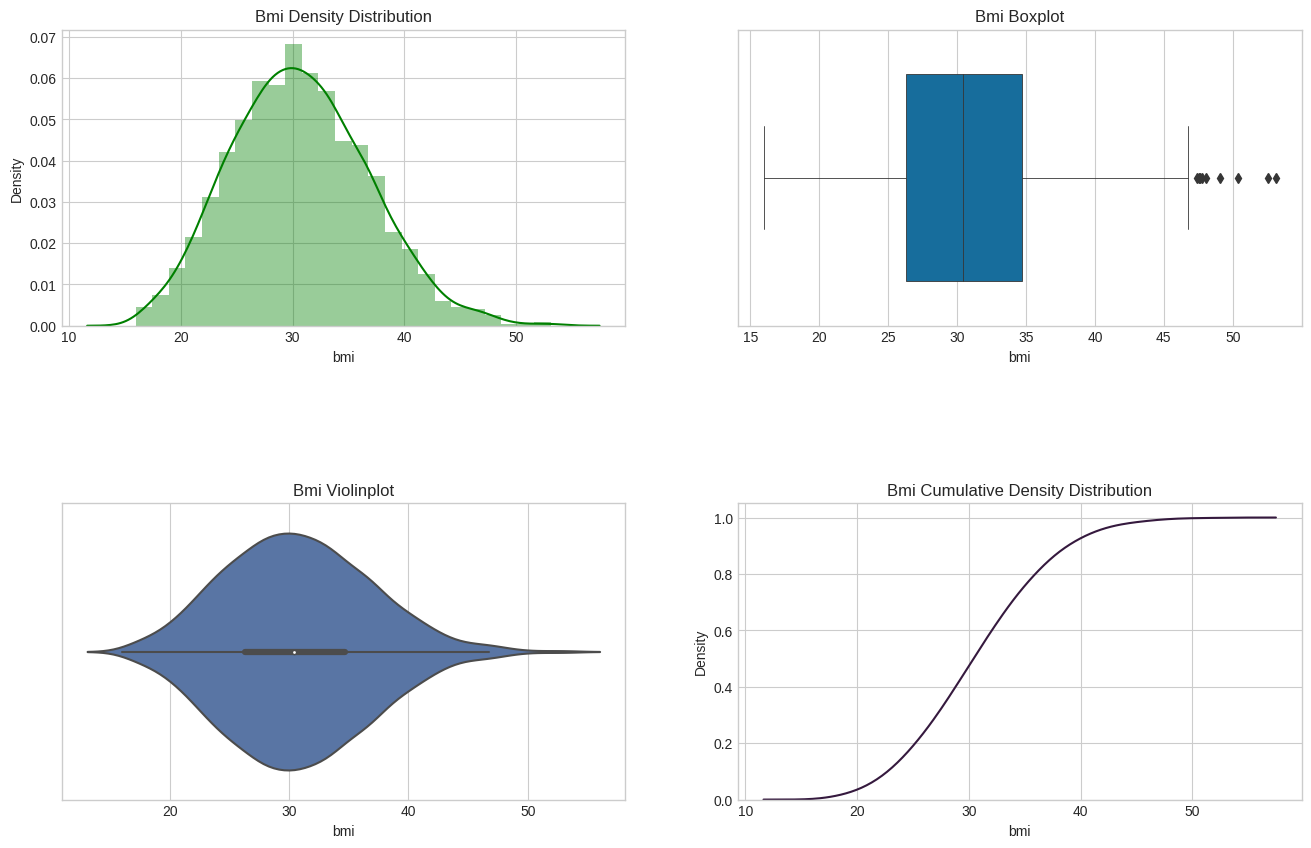

In [ ]:
summary('bmi')

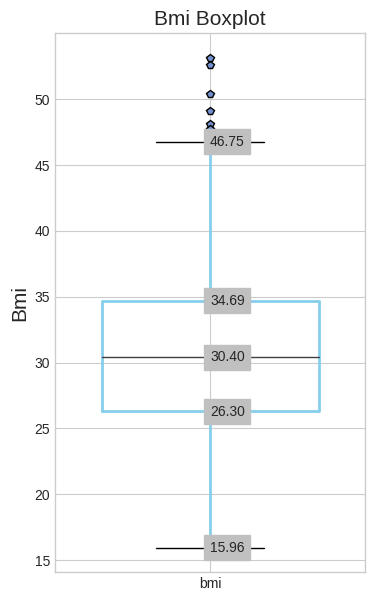

Mean Bmi = 30.66339686098655
Median Bmi = 30.4
Skewness of bmi: 0.2840471105987448.
Total number of outliers in bmi distribution: 9.


In [ ]:
box_plot('bmi')


5 Point Summary of Charges Attribute:
Charges(min) : 1121.8739
Q1                    : 4740.28715
Q2(Median)            : 9382.033
Q3                    : 16639.912515
Charges(max) : 63770.42801


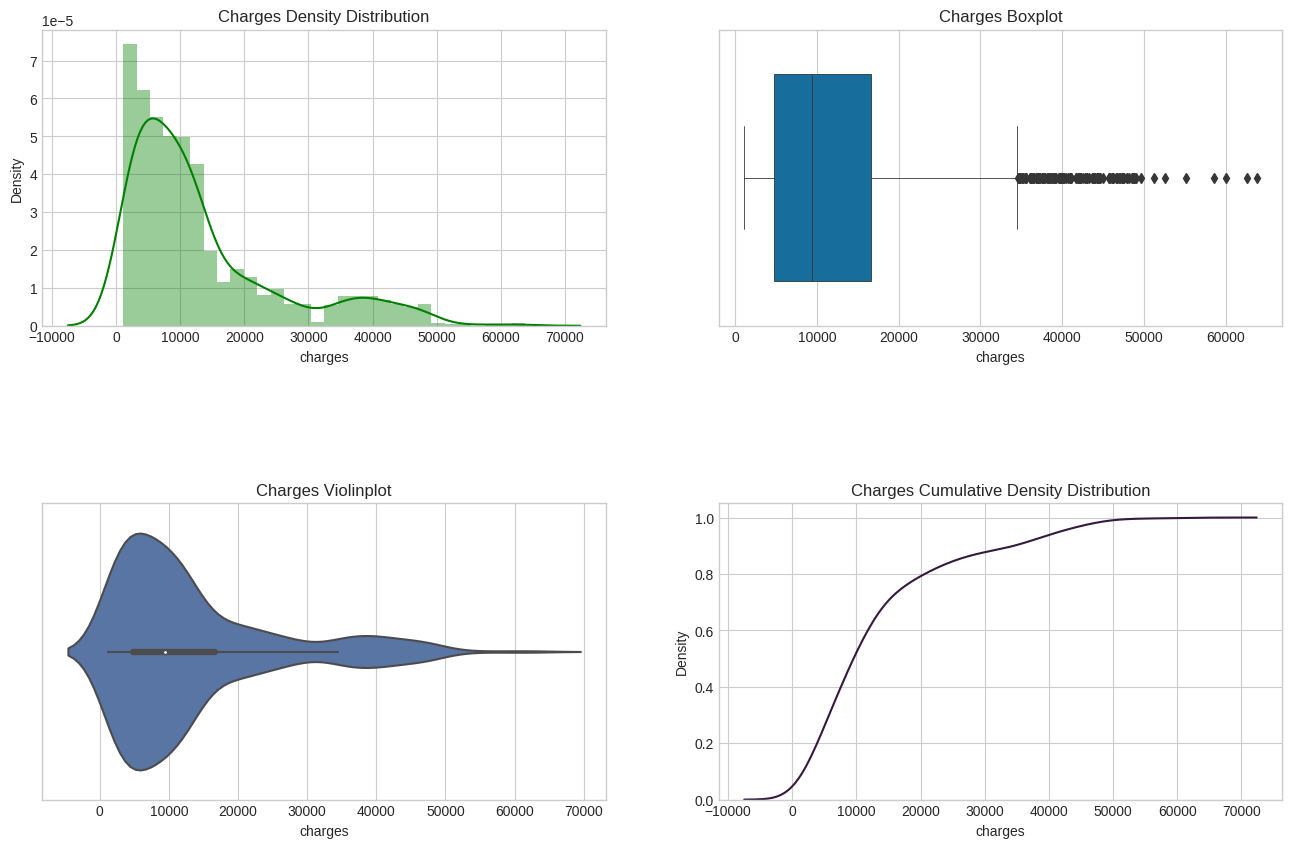

In [ ]:
summary('charges')

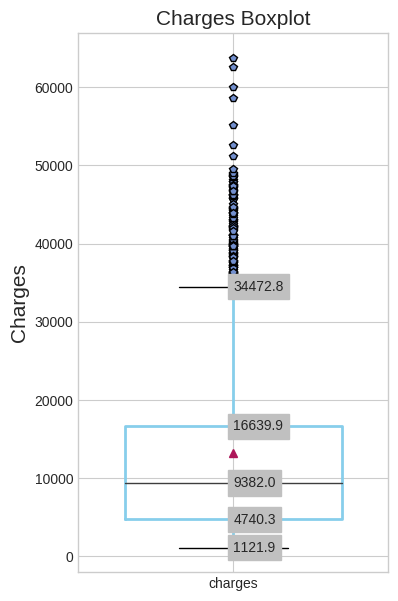

Mean Charges = 13270.422265141257
Median Charges = 9382.033
Skewness of charges: 1.5158796580240388.
Total number of outliers in charges distribution: 139.


In [ ]:
box_plot('charges')

5 Point Summary of Children Attribute:
Children(min) : 0
Q1                    : 0.0
Q2(Median)            : 1.0
Q3                    : 2.0
Children(max) : 5


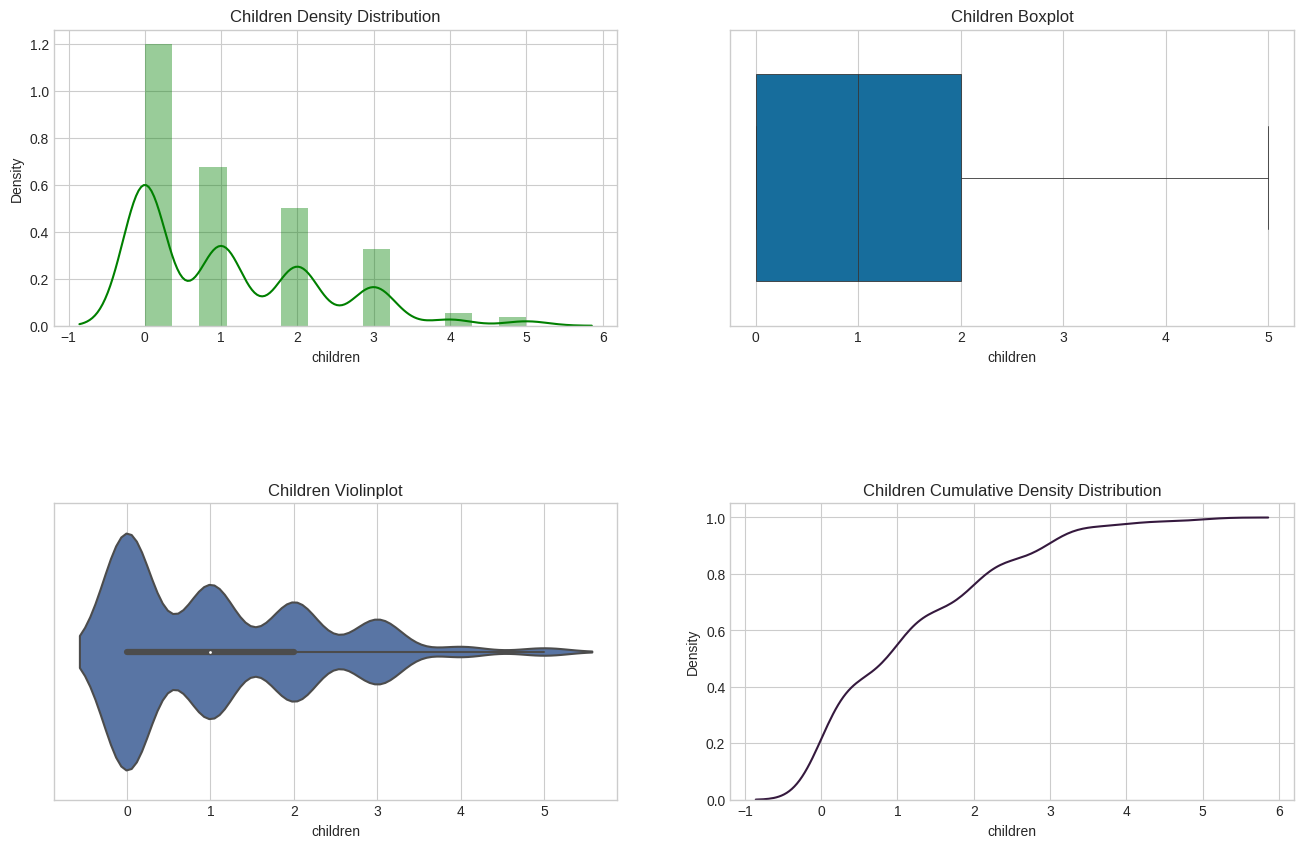

In [ ]:
summary('children')

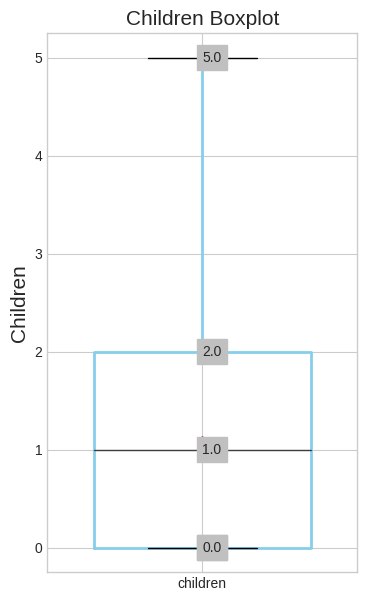

Mean Children = 1.0949177877429
Median Children = 1.0
Skewness of children: 0.9383804401702414.
Total number of outliers in children distribution: 0.


In [ ]:
box_plot('children')

<Axes: xlabel='sex', ylabel='count'>

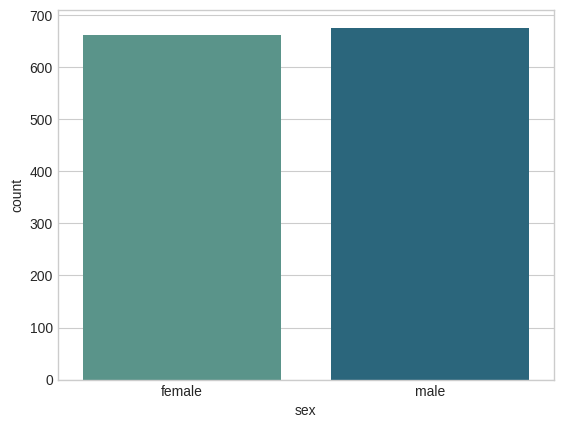

In [ ]:
sns.countplot(x = 'sex', data = data, palette="crest")

<Axes: xlabel='region', ylabel='count'>

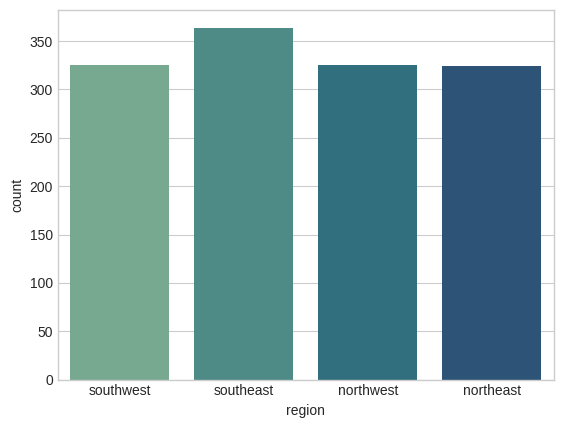

In [ ]:
sns.countplot(x = 'region',palette='crest', data = data)

<Axes: xlabel='smoker', ylabel='count'>

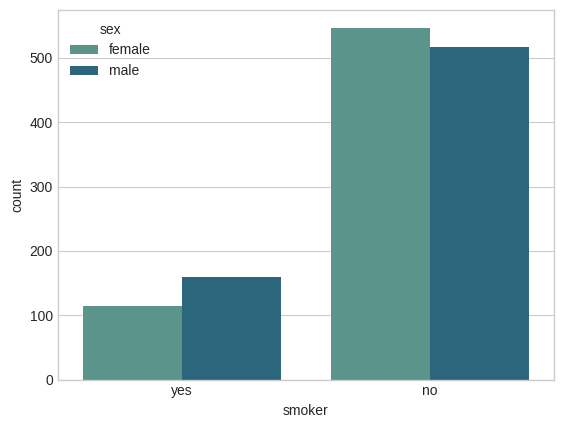

In [ ]:
sns.countplot(x = 'smoker',hue='sex', data = data, palette="crest")

In [ ]:
data.groupby(['smoker', 'sex']).agg('count')

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

<Axes: xlabel='smoker', ylabel='charges'>

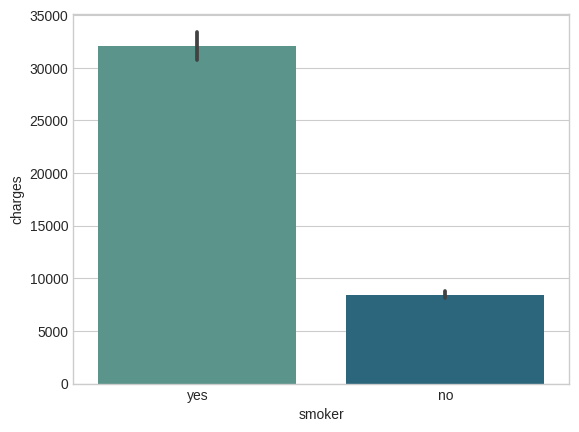

In [ ]:
sns.barplot(x = "smoker", y = "charges",palette="crest", data = data)

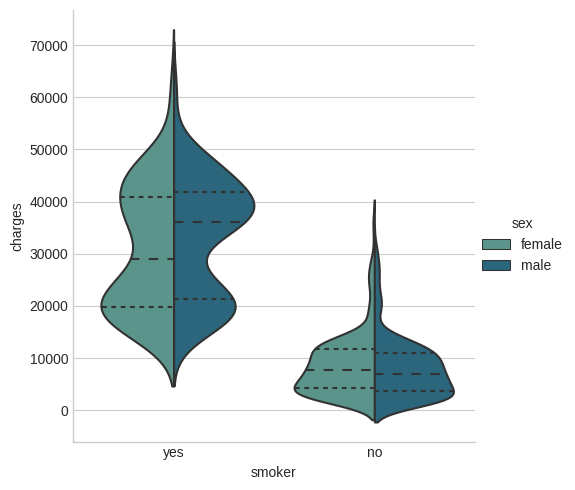

In [ ]:
sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="crest", data=data);

In [ ]:
data.groupby(['smoker', 'age']).agg('count')

sex  bmi  children  region  charges
smoker age                                     
no     18    57   57        57      57       57
       19    50   50        50      50       50
       20    20   20        20      20       20
       21    26   26        26      26       26
       22    22   22        22      22       22
...         ...  ...       ...     ...      ...
yes    60     5    5         5       5        5
       61     6    6         6       6        6
       62     4    4         4       4        4
       63     5    5         5       5        5
       64     7    7         7       7        7

[94 rows x 5 columns]

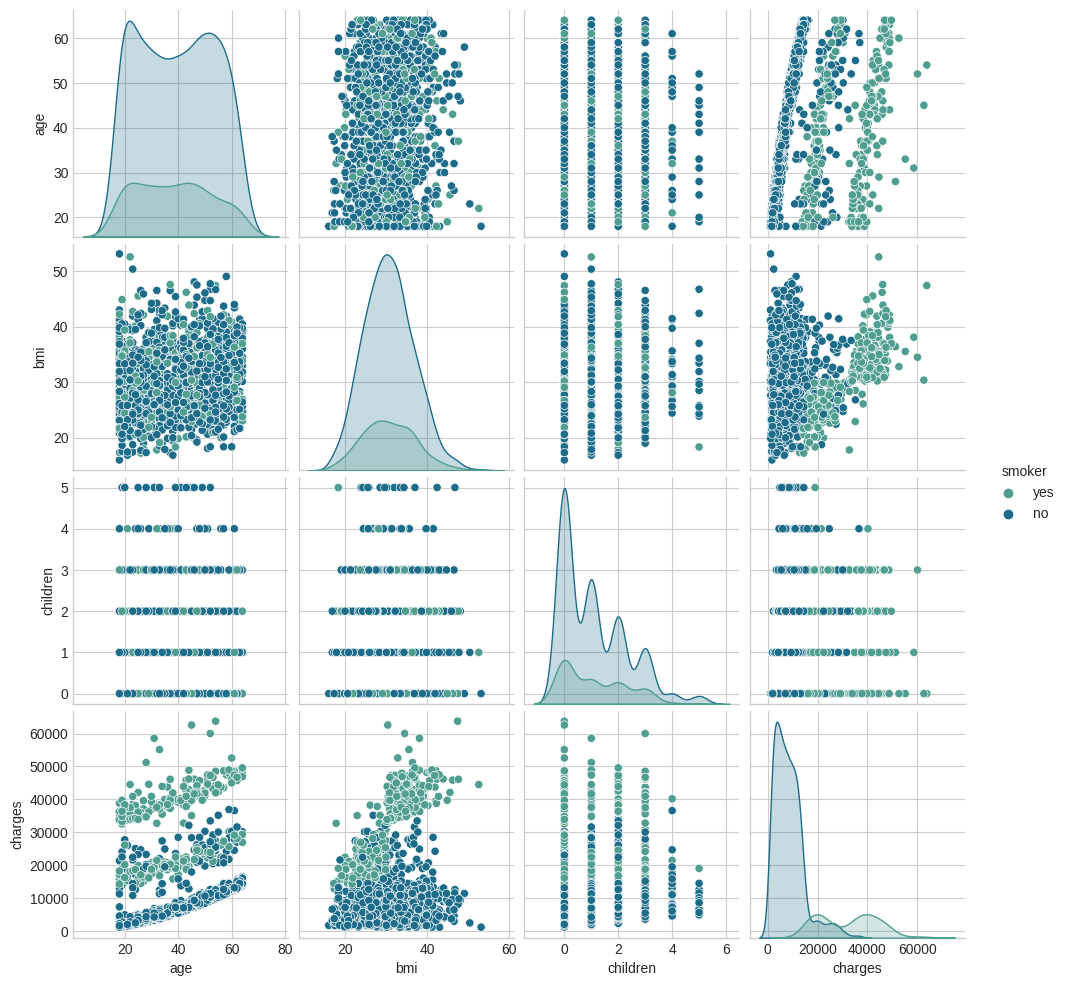

In [ ]:
sns.pairplot(data, hue  = 'smoker', palette='crest')



---



---


  
                                                                 UMAIMA ALI


---



---


